In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pymc3 as pm
import seaborn as sns


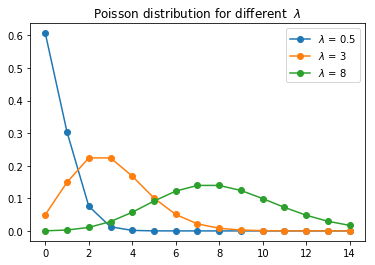

In [4]:
    x = np.arange(0, 15)

    fig,ax = plt.subplots(1,1) 
    for m in [0.5, 3, 8]:
        pmf = st.poisson.pmf(x, m)
        plt.plot(x, pmf, '-o', label='$\lambda$ = {}'.format(m))
    plt.title('Poisson distribution for different  $\lambda$')
    plt.legend()
    plt.show()

    

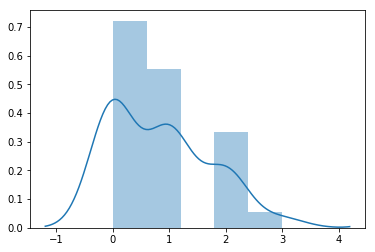

In [12]:
    lambda_ = 0.8
    data = st.poisson.rvs(lambda_, size =30)
    sns.distplot(data);

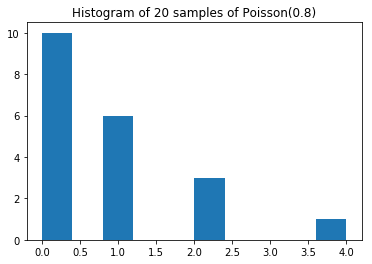

In [15]:
    lambda_ = 0.8
    data = st.poisson.rvs(lambda_, size =20)
    plt.hist(data)
    plt.title("Histogram of 20 samples of Poisson({})".format(lambda_))
    # bootstrap : sample with replacement
    sample_count = 1000
    bstrap = np.random.choice(data, sample_count, replace = True)


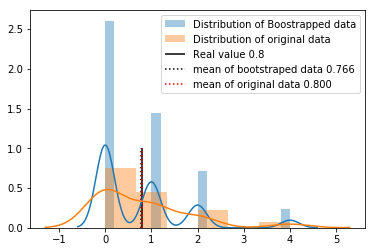

Difference in means : Boostrap: 0.766 Original Data 0.8 Delta -0.03400000000000003 


In [22]:
'''
Let's compare the bootstrap average and the original data average
'''

plt.subplots(1,1)
sns.distplot(bstrap, label = 'Distribution of Boostrapped data')
plt.vlines(lambda_, 0, 1,  label = 'Real value {}'.format(lambda_)  )
plt.vlines(np.mean(bstrap), 0, 1,  linestyle =':', label = 'mean of bootstraped data {:.3f}'.format(np.mean(bstrap))  )
sns.distplot(data, label = 'Distribution of original data')
plt.vlines(np.mean(data), 0, 1, linestyle = ':', color = 'red', label = 'mean of original data {:.3f}'.format(np.mean(data))  )
plt.legend();
plt.show()

print("Difference in means : Boostrap: {} Original Data {} Delta {} ".format(np.mean(bstrap), np.mean(data),  np.mean(bstrap) - np.mean(data)  ))

In [23]:
with pm.Model() as model:
    # Uniform prior
    lambda_ = pm.Uniform('lambda_', lower = 0, upper = 10)
    # likelihood as Poisson
    obs = pm.Poisson('x',  lambda_, observed = data)
    trace = pm.sample(sample_count)


WARNING (theano.gof.compilelock): Overriding existing lock by dead process '97168' (I am process '99121')
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda_]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 5881.79draws/s]


In [24]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
lambda_,0.843245,0.203995,0.005423,0.464789,1.243628,1673.034599,1.001151


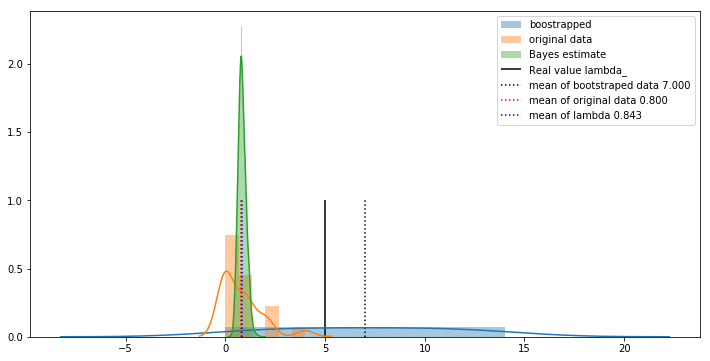

In [25]:
    plt.subplots(1,1, figsize=(12,6))
    sns.distplot(x, label = 'boostrapped')
    plt.vlines(5, 0, 1,  label = 'Real value {}'.format(lambda_)  )
    plt.vlines(np.mean(x), 0, 1,  linestyle =':', label = 'mean of bootstraped data {:.3f}'.format(np.mean(x))  )
    sns.distplot(data,  label = 'original data')
    plt.vlines(np.mean(data), 0, 1, linestyle = ':', color = 'red', label = 'mean of original data {:.3f}'.format(np.mean(data))  )
    sns.distplot(trace['lambda_'], label = 'Bayes estimate')
    plt.vlines(np.mean(trace['lambda_']), 0, 1,  linestyle = ':',color = 'blue', label = 'mean of lambda {:.3f}'.format(np.mean(trace['lambda_']))  )
    plt.legend()


In [27]:
print("Difference in means : Boostrap: {:.4f} Original Data {} Delta {:.4f} ".format(np.mean(bstrap), np.mean(data),  np.mean(bstrap) - np.mean(data)  ))
print("Difference in means : Bayes: {:.4f} Original Data {} Delta {:.4f} ".format(np.mean(trace['lambda_']), np.mean(data),  np.mean(trace['lambda_']) - np.mean(data)  ))

Difference in means : Boostrap: 0.7660 Original Data 0.8 Delta -0.0340 
Difference in means : Bayes: 0.8432 Original Data 0.8 Delta 0.0432 


# Impact of sample size
* Generate a dataset of 1000 samples
* Increase subset size: 10, 50, 100, 500, 1000
* Compare accuracy of different estimator
* Impact of sample size?

